In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
from mix_Network import network, histoscore
name = 'homhots'
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nblay = 3
nbclust = 4
filt = 2
def netparam(name, filt, tau, nblay, nbclust, sigma, homeinv, jitter):
    if name=='hots':
        homeo = False
        homeotest = False
        krnlinit = 'first'
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
        hotshom = hotshom.learning1by1()
    elif name=='homhots':
        homeo = True
        homeotest = True
        krnlinit = 'rdn'
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
        hotshom = hotshom.learningall()
    elif name=='onlyonline':
        homeo = False
        homeotest = False
        krnlinit = 'rdn'
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
        hotshom = hotshom.learningall()
    return hotshom, homeotest

In [3]:
def runjit(hotshom, jit_s, jit_t, homeotest, trainhistomap, nb_test):
    score_S = []
    score_T = []
    for i in jit_s:
        i = round(i,1)
        jitonic = [None,i]
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic)
        JS_score = histoscore(trainhistomap,testhistomap, verbose = False)
        print(f'loading... - spatial jitter = {i} - score = {JS_score}',end='\r')
        score_S.append(JS_score)

    for j in jit_t:
        j = round(j,1)
        jitonic = [j,None]
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic)
        JS_score = histoscore(trainhistomap,testhistomap, verbose = False)
        print(f'loading... - temporal jitter = {j} - score = {JS_score}',end='\r')
        score_T.append(JS_score)
        
    return score_S, score_T

2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False


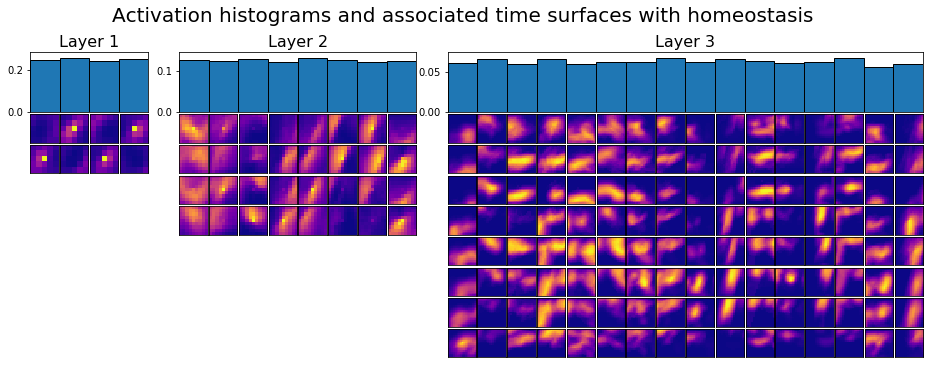

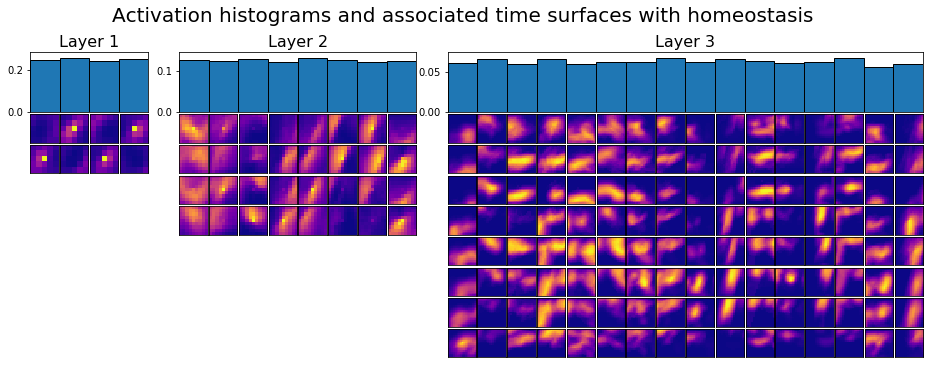

In [4]:
nethots, homeotest = netparam(name, filt, tau, nblay, nbclust, sigma, homeinv, jitter)
nethots.plotlayer()

# Spatial and Temporal Jitter

In [5]:
import numpy as np
jit_s = np.arange(0,6,0.2)
jit_t = np.arange(0,300,10)
jit_s, jit_t = jit_s**2, jit_t**2
#jit_s = [0]
#jit_t = [0]
nb_test = 10000
nb_train = 60000

In [6]:
import pickle
timestr = '2021-03-01'
for name in ['hots','homhots', 'onlyonline']:
    nethots, homeotest = netparam(name, filt, tau, nblay, nbclust, sigma, homeinv, jitter)
    trainhistomap = nethots.running(homeotest=homeotest, nb_digit = nb_train)
    score_S, score_T = runjit(nethots, jit_s, jit_t, homeotest, trainhistomap, nb_test)
    f_name = f'../Records/EXP_03_NMNIST/{timestr}_results_jitter_histo_{name}.pkl'
    with open(f_name, 'wb') as file:
        pickle.dump([score_T, jit_t, score_S, jit_s], file, pickle.HIGHEST_PROTOCOL)

2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True
../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_4000_[None, None]_histo.pkl
no jitter


  0%|          | 0/4000 [00:00<?, ?it/s]

../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_100_[None, 0.0]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_100_[None, 0.0]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_100_[None, 0.2]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_100_[None, 0.4]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_100_[None, 0.6]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_100_[None, 1.0]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_Fals

  0%|          | 0/4000 [00:00<?, ?it/s]

../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.0]_homeo_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.0]_homeo_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.2]_homeo_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.4]_homeo_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.6]_homeo_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 1.0]_homeo_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16

  0%|          | 0/4000 [00:00<?, ?it/s]

../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.0]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.0]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.2]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.4]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 0.6]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_100_[None, 1.0]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_False_[0.25,

<span style="color:red">**=======**</span>

# Temporal Jitter only on the classification

# Testing without homeostasis